### PyCUDA
- PyCUDA covers all of the overhead of memory allocation, deallocation, and data transfers with the `gpuarray` class.
- PyCUDA acts similarly to NumPy arrays, using vector/ matrix/tensor shape structure information for the data.
- `gpuarray` objects even perform automatic cleanup, so we do not have to worry about freeing any GPU memory stored in a gpuarray object when we are done with it.
- https://stackoverflow.com/questions/71651310/getting-nvcc-preprocessing-failed-error-pycuda
- `nvcc --version`, `nvidia-smi`
- https://github.com/LouieYang/deep-photo-styletransfer-tf/issues/13
- Add this to PATH: C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.40.33807\bin\Hostx64\x64

In [1]:
import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import numpy as np

# Test data
a = np.array([1, 2, 3], dtype=np.float32)
b = np.array([4, 5, 6], dtype=np.float32)

# Transfer data to GPU
a_gpu = gpuarray.to_gpu(a)
b_gpu = gpuarray.to_gpu(b)

# Perform vector addition on GPU
c_gpu = a_gpu + b_gpu

# Transfer result back to CPU
c = c_gpu.get()

print("Result of GPU addition:", c)


Result of GPU addition: [5. 7. 9.]


In [2]:
# Speed comparison test between a scalar multiplication on the CPU and then the same operation on the GPU
import numpy as np
# Initialize PyCUDA
import pycuda.autoinit
from pycuda import gpuarray
from time import time

# NumPy float32 corresponds directly with the float type in C/C==
# Recommended to specifically set data types with NumPy when we are sending data to the GPU
# 1. Avoid any unnecessary overhead of using an unnecessary type that will possibly take up more computational time or memory
# 2. Working with CUDA C, which C is a statically-typed language, so have to be very specific with types or our code

# Generate an array of 50 million random 32-bit floating point values, roughly 48MB data
host_data = np.float32( np.random.random(50000000) )

# Remember to specifically set data types for NumPy arrays that will be transferred to the GPU. 
# This can be done with the dtype option in the constructor of the numpy.array class.
# host_data = np.array([1,2,3,4,5], dtype=np.float32)

t1 = time()
host_data_2x =  host_data * np.float32(2)
t2 = time()

print('total time to compute on CPU: %f' % (t2 - t1))

total time to compute on CPU: 0.058408


In [3]:
# Transfer host_data (numpy array) to the GPU and create a new GPU array
device_data = gpuarray.to_gpu(host_data)

t1 = time()
# Computation
device_data_2x =  device_data * np.float32( 2 )

# ython multiplication operator (*) to multiply each element in a gpuarray object by a scalar value
# pointwise operation is intrinsically parallelizable since the computation of one element is not dependent on the computation of any other element.

# device_data_2x = 2 * device_data
t2 = time()

# Retrieve the GPU data
from_device = device_data_2x.get()
print(from_device)


print('total time to compute on GPU: %f' % (t2 - t1))
# NumPy's allclose function to compare the two output values
print('Is the host computation the same as the GPU computation? : {}'.format(np.allclose(from_device, host_data_2x) ))


[1.01435   0.4593858 1.1851627 ... 1.497949  0.7712824 0.6459297]
total time to compute on GPU: 7.730603
Is the host computation the same as the GPU computation? : True


### Running time_cacl0.py
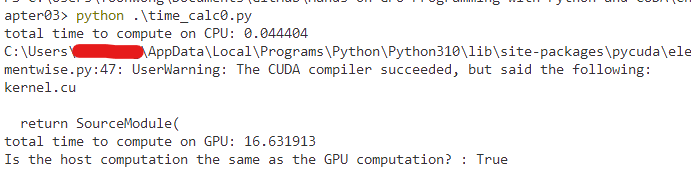

### Investigate performance using IPython's built-in prun profiler (similar to cProfiler)

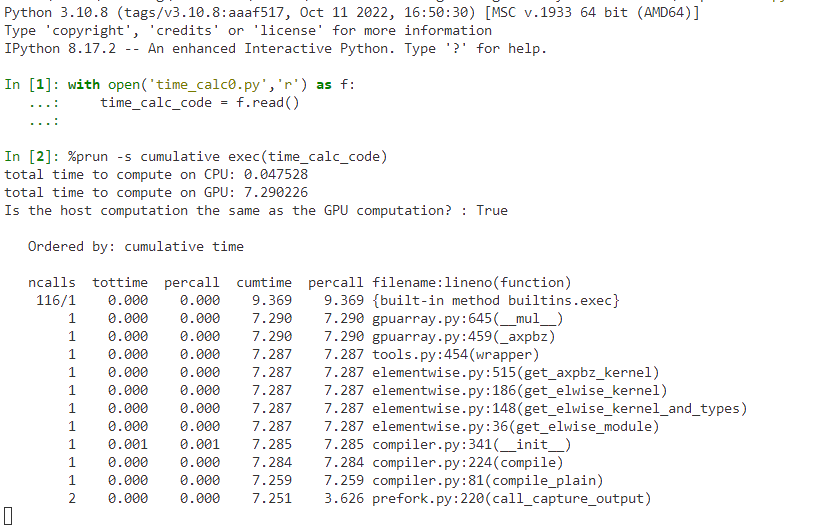

- `compiler.py` took around 1 second total, little less than the time taken by GPU computation

### Running 2nd time

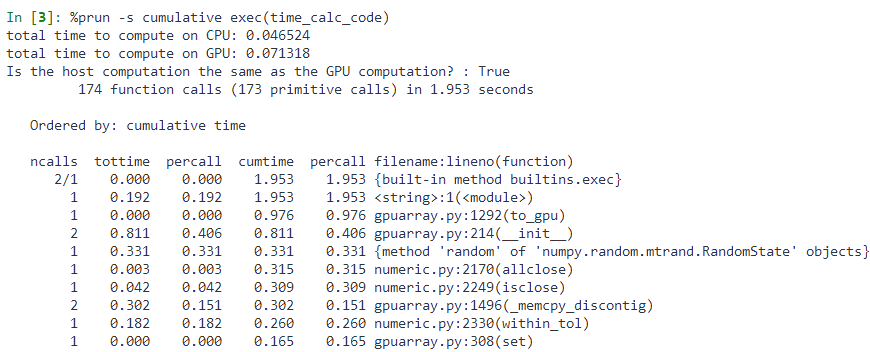

- No calls to `compiler.py`
- Reason: "By the nature of the PyCUDA library, GPU code is often compiled and linked with NVIDIA's nvcc compiler the first time it is run in a given Python session; it is then cached and, if the code is called again, then it doesn't have to be recompiled."
- Later: This is will be ameliorated by using the pre-compiled code (Chapter 10) or using NVIDIA's own linear algebra libraries with the Scikit-CUDA module (Chapter 7)

### Conclusion
"In PyCUDA, GPU code is often compiled at runtime with the NVIDIA nvcc compiler and then subsequently called from PyCUDA. This can lead to an unexpected slowdown, usually the first time a program or GPU operation is run in a given Python session."